```
#pd.cut()과 pd.qcut()를 아래 괄호 안에 각각 알맞게 넣으시오

가. 동일 길이로 나누어서 범주를 만든다.(pd.cut)
나. 동일 개수로 나누어서 범주를 만든다.(pd.qcut)
```

```
# stack과 unstack를 아래 괄호안에 각각 알맞게 넣으시오.

가. 로우를 컬럼으로 피벗시킨다.() -> unstack(결과물이 길어지고 인덱스 새로 생김)
나. 데이터의 칼럼을 로우로 피벗시킨다.() -> stack
```

```
# merge 함수는 기본적으로 합집합 결과를 반환한다.(o,x) -> X
```

In [9]:
# -999와 -1000을 결측치로 바꿔라
import pandas as pd
import numpy as np

data = pd.Series([1., -999., 2., -999., -1000., 3.])
data.replace([-999, -1000], np.nan) 

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

```
# 데이터에 중복되는 값을 제거하기 위해 쓰이는 메소드는?
data.drop_duplicates()
```

```
#하나 이상의 공백을 의미하는 것
\s+
```

In [12]:
# 칼럼의 이름이 같음. 합치기
df = pd.DataFrame({'A' : ['a5', 'a6'], 'B' : ['b5', 'b6'], 'C' : ['c5', 'c6']}) 
new_row = pd.DataFrame([['aaa', 'bbb', 'ccc']], columns = df.columns)

pd.concat([df, new_row], ignore_index = True) 

,A,B,C
0,a5,b5,c5
1,a6,b6,c6
2,aaa,bbb,ccc


In [16]:
# B,C 칼럼 합치고 A 살리기
df = pd.DataFrame({'A' : ['a1', 'a2', 'a3', 'a4'],
                  'B' : ['b1', 'b2', 'b3', 'b4'],
                  'C' : [1, 2, 3, 4]})

df.melt(id_vars='A', value_vars =['B','C'], var_name='New')

,A,New,value
0,a1,B,b1
1,a2,B,b2
2,a3,B,b3
3,a4,B,b4
4,a1,C,1
5,a2,C,2
6,a3,C,3
7,a4,C,4


In [31]:
# 절대값이 3 이상인 값을 찾기
np.random.seed(1234)
a = pd.DataFrame(np.random.randn(1000,5))
a = a[(np.abs(a) > 3).any(1)]
a

,0,1,2,3,4
16,0.464392,-3.563517,1.321106,0.152631,0.164530
261,-1.241138,0.614358,3.125635,0.654370,2.095345
266,-0.015286,-1.569014,-0.368085,3.109635,-0.623207
334,-3.880898,0.974470,0.415160,1.751967,0.485011
410,-0.384506,-1.297242,1.148495,-3.277304,-1.363946
457,0.343116,-0.033853,-0.061556,-0.711204,3.220568
627,-0.701835,-3.233505,0.200243,-0.139337,-0.037094
784,0.980528,0.555156,0.369371,-0.637441,-3.434819
895,0.733885,1.558772,-3.016387,0.248943,-0.425582
919,-1.560564,0.516757,-0.700560,0.679548,-3.150762


In [42]:
# pd의 cut을 사용하여 length을 3구간으로 나누기
import pydataset
movies = pydataset.data('movies')
movies = movies[['title','year','length']]
movies

,title,year,length
1,$,1971,121
2,$1000 a Touchdown,1939,71
3,$21 a Day Once a Month,1941,7
4,"$40,000",1996,70
5,"$50,000 Climax Show, The",1975,71
...,...,...,...
58784,tom thumb,1958,98
58785,www.XXX.com,2003,105
58786,www.hellssoapopera.com,1999,100
58787,xXx,2002,132


In [37]:
movies['length']

1        121
2         71
3          7
4         70
5         71
        ... 
58784     98
58785    105
58786    100
58787    132
58788    101
Name: length, Length: 58788, dtype: int64

In [44]:
pd.cut(movies['length'], bins = [1,60,100,180], labels = ['short', 'mid', 'long']) 

1         long
2          mid
3        short
4          mid
5          mid
         ...  
58784      mid
58785     long
58786      mid
58787     long
58788     long
Name: length, Length: 58788, dtype: category
Categories (3, object): ['short' < 'mid' < 'long']

In [46]:
# 나눈 구간을 새로운 칼럼으로 만들기
movies['categories'] = pd.cut(movies['length'], [1, 60, 100, 180], labels=['short', 'mid', 'long']) 
movies[:2]

,title,year,length,categories
1,$,1971,121,long
2,$1000 a Touchdown,1939,71,mid


```
# 데이터를 이어붙이려고 pd.concat(df1, df2) 에러가 났다. 이유는?
-> 2개 이상이니까 df1과 df2을 대괄호로 묶어야한다.
```

In [51]:
# class, 과목(math, science), 점수로 묶어주기
df=pd.read_excel("excel_exam.xlsx")
df[:2]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [55]:
df.melt(id_vars='nclass',value_vars=['math','science'],var_name='과목',value_name='점수')

,nclass,과목,점수
0,1,math,50
1,1,math,60
2,1,math,45
3,1,math,30
4,2,math,25
5,2,math,50
6,2,math,80
7,2,math,90
8,3,math,20
9,3,math,50


# 오늘 공부 시작

# pivot

In [56]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df 

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [57]:
df1 = df.melt(id_vars=['key'],value_vars=['A','B','C'])
df1[:4]

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4


In [61]:
df1.pivot(index='key', columns='variable', values='value')

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [62]:
df1.pivot(index='key', columns='variable', values='value').reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [68]:
data = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/macrodata.csv") 
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [69]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'}) 

In [76]:
ldata.head()

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [75]:
pivoted = ldata.pivot(index='date', columns='item', values='value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [78]:
ldata['value2'] = np.random.randn(len(ldata))  #새로운 칼럼 생성
ldata[:2]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.381248
1,1959-03-31 23:59:59.999999999,infl,0.000,0.614400


In [82]:
ldata.pivot('date', columns='item')[:4]
# value와 value2을 안 정해줬더니 각각의 출력물로 출력되었다.
# 하지만 권장하진 않음.

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.614400 -0.381248   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.379150  1.115031   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.719608  0.210902   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.826154 -1.999640   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.531931  
1959-06-30 23:59:59.999999999  0.244808  
1959-09-30 23:59:59.999999999  0.094109  
1959-12-31 23:59:59.999999999 -0.893353

In [85]:
ldata.pivot(index='date', columns='item', values=['value','value2'])[:4]
# 이렇게 해주는게 명확하고 좋다. 무조건 압축하는게 좋은게 아님.

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.614400 -0.381248   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.379150  1.115031   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.719608  0.210902   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.826154 -1.999640   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.531931  
1959-06-30 23:59:59.999999999  0.244808  
1959-09-30 23:59:59.999999999  0.094109  
1959-12-31 23:59:59.999999999 -0.893353

In [87]:
ldata.pivot(index='date', columns='item', values=['value','value2']).reset_index().head()

date value                    value2            \
item                                infl   realgdp unemp      infl   realgdp   
0    1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.614400 -0.381248   
1    1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.379150  1.115031   
2    1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.719608  0.210902   
3    1959-12-31 23:59:59.999999999  0.27  2785.204   5.6  0.826154 -1.999640   
4    1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.414780 -1.076738   

                
item     unemp  
0     0.531931  
1     0.244808  
2     0.094109  
3    -0.893353  
4    -0.840527

In [90]:
ldata.set_index(['date','item']) #item에 있는것을 앞으로 쏙 빼기

value    value2
date                          item                        
1959-03-31 23:59:59.999999999 realgdp   2710.349 -0.381248
                              infl         0.000  0.614400
                              unemp        5.800  0.531931
1959-06-30 23:59:59.999999999 realgdp   2778.801  1.115031
                              infl         2.340  0.379150
...                                          ...       ...
2009-06-30 23:59:59.999999999 infl         3.370 -1.514270
                              unemp        9.200  1.894011
2009-09-30 23:59:59.999999999 realgdp  12990.341 -0.092662
                              infl         3.560  0.480838
                              unemp        9.600  0.625943

[609 rows x 2 columns]

In [91]:
ldata.set_index(['date','item']).unstack()

value                     value2            \
item                           infl    realgdp unemp      infl   realgdp   
date                                                                       
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8  0.614400 -0.381248   
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1  0.379150  1.115031   
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3  0.719608  0.210902   
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6  0.826154 -1.999640   
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2  0.414780 -1.076738   
...                             ...        ...   ...       ...       ...   
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0 -1.313783 -0.920890   
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9  2.304398  1.112804   
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1  0.194087  0.296317   
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2 -1.514270  1.917559   
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6  0.480838 -0.092662   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.531931  
1959-06-30 23:59:59.999999999  0.244808  
1959-09-30 23:59:59.999999999  0.094109  
1959-12-31 23:59:59.999999999 -0.893353  
1960-03-31 23:59:59.999999999 -0.840527  
...                                 ...  
2008-09-30 23:59:59.999999999  0.449891  
2008-12-31 23:59:59.999999999 -0.956785  
2009-03-31 23:59:59.999999999  0.588140  
2009-06-30 23:59:59.999999999  1.894011  
2009-09-30 23:59:59.999999999  0.625943  

[203 rows x 6 columns]

# 선그래프

<AxesSubplot:>

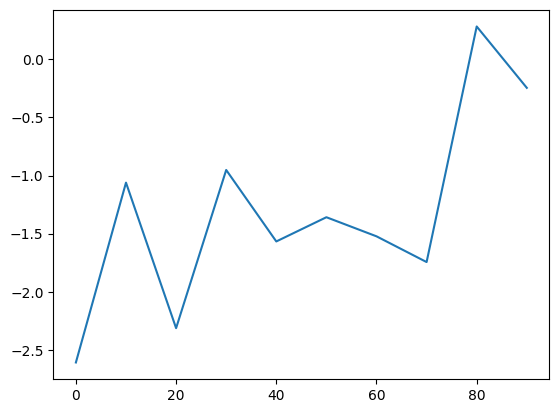

In [99]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

<AxesSubplot:>

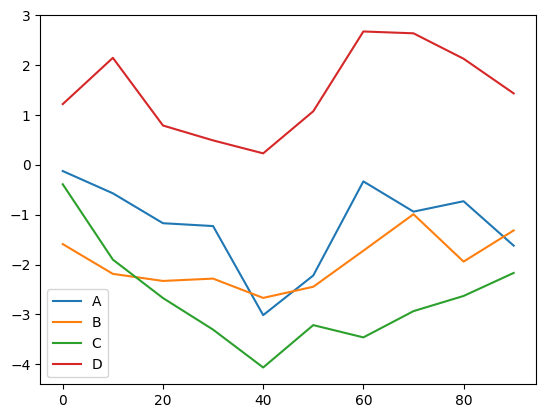

In [108]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10)) 
df.plot()

<AxesSubplot:>

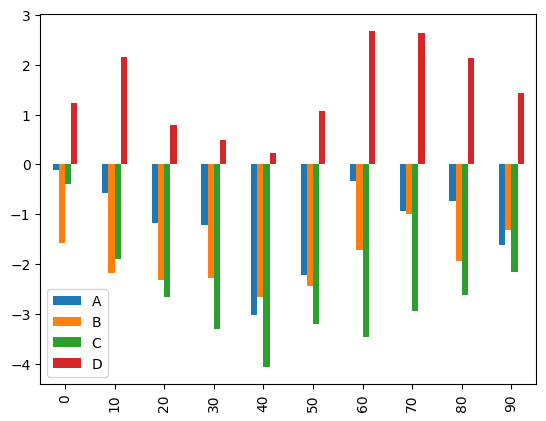

In [113]:
df.plot(kind = 'bar')

<AxesSubplot:>

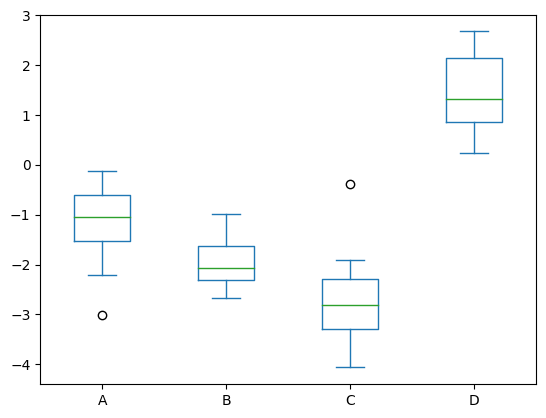

In [114]:
df.plot(kind='box')

<AxesSubplot:>

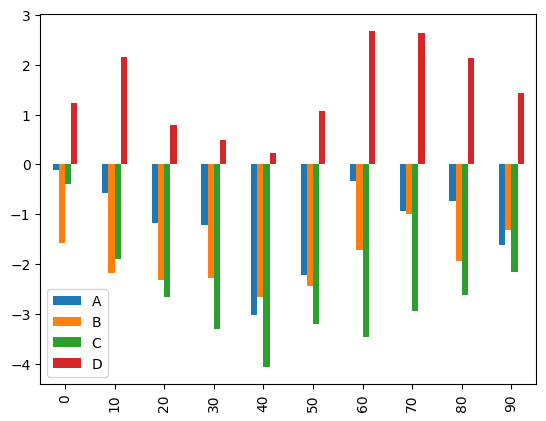

In [115]:
df.plot.bar()

In [116]:
import pydataset

In [117]:
tips = pydataset.data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [119]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [121]:
party_pcts = party_counts.div(party_counts.sum(axis=1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


In [128]:
#matplotlib 에서는
#모든 데이터프레임 인덱스 부분을 따로 정해주지 않으면 자동으로 x축으로 잡는다.

<AxesSubplot:xlabel='day'>

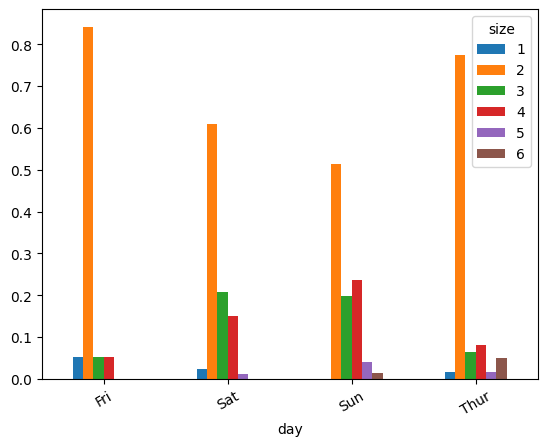

In [127]:
party_pcts.plot.bar(rot=30)

# seaborn

In [132]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

<AxesSubplot:>

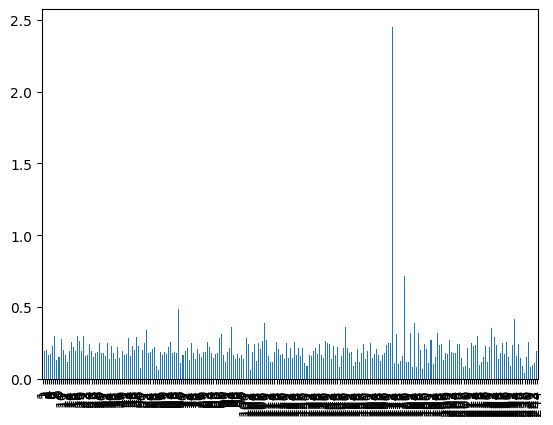

In [135]:
tips['tip_pct'].plot.bar()

<AxesSubplot:xlabel='day', ylabel='tip_pct'>

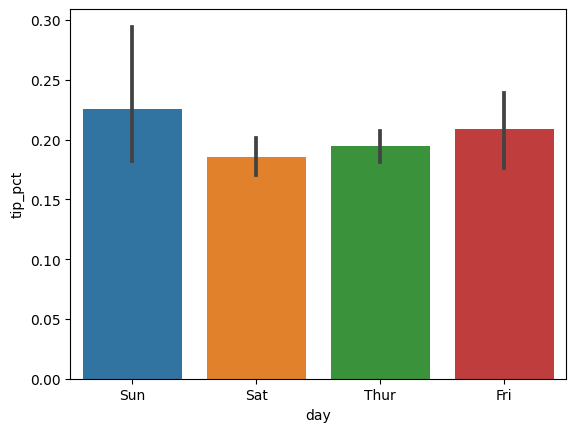

In [141]:
import seaborn as sns
sns.barplot(data = tips, x='day', y='tip_pct')

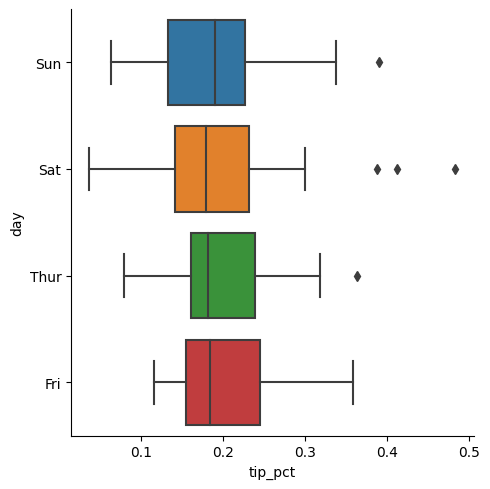

In [145]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

In [146]:
tips[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
2,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
3,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
4,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
5,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [151]:
tips.pivot(columns='day', values='tip_pct')

day,Fri,Sat,Sun,Thur
1,NaN,NaN,0.063204,NaN
2,NaN,NaN,0.191244,NaN
3,NaN,NaN,0.199886,NaN
4,NaN,NaN,0.162494,NaN
5,NaN,NaN,0.172069,NaN
...,...,...,...,...
240,NaN,0.256166,NaN,NaN
241,NaN,0.079428,NaN,NaN
242,NaN,0.096759,NaN,NaN
243,NaN,0.108899,NaN,NaN


In [2]:
!pip install plotly

     --------------------------------------- 15.2/15.2 MB 22.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import plotly.express as px

In [34]:
df = px.data.gapminder()
df[:2]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [36]:
# year, country, gdpPercap을 이용하여 pivot을 해주세요.

df.pivot(index='year', columns='country', values='gdpPercap').head()

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,8343.105127,...,734.753484,9979.508487,13990.48208,5716.766744,7689.799761,605.066492,1515.592329,781.717576,1147.388831,406.884115
1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,9714.960623,...,774.371069,11283.177950,14847.12712,6150.772969,9802.466526,676.285448,1827.067742,804.830455,1311.956766,518.764268
1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,10991.206760,...,767.271740,12477.177070,16173.14586,5603.357717,8422.974165,772.049160,2198.956312,825.623201,1452.725766,527.272182
1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,13149.041190,...,908.918522,14142.850890,19530.36557,5444.619620,9541.474188,637.123289,2649.715007,862.442146,1777.077318,569.795071
1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,16672.143560,...,950.735869,15895.116410,21806.03594,5703.408898,10505.259660,699.501644,3133.409277,1265.047031,1773.498265,799.362176


In [37]:
df.pivot(index='year', columns='country', values=['gdpPercap','pop']).head()

gdpPercap                                                      \
country Afghanistan      Albania      Algeria       Angola    Argentina   
year                                                                      
1952     779.445314  1601.056136  2449.008185  3520.610273  5911.315053   
1957     820.853030  1942.284244  3013.976023  3827.940465  6856.856212   
1962     853.100710  2312.888958  2550.816880  4269.276742  7133.166023   
1967     836.197138  2760.196931  3246.991771  5522.776375  8052.953021   
1972     739.981106  3313.422188  4182.663766  5473.288005  9443.038526   

                                                                            \
country    Australia       Austria       Bahrain  Bangladesh       Belgium   
year                                                                         
1952     10039.59564   6137.076492   9867.084765  684.244172   8343.105127   
1957     10949.64959   8842.598030  11635.799450  661.637458   9714.960623   
1962     12217.22686  10750.721110  12753.275140  686.341554  10991.206760   
1967     14526.12465  12834.602400  14804.672700  721.186086  13149.041190   
1972     16788.62948  16661.625600  18268.658390  630.233627  16672.143560   

         ...         pop                                                      \
country  ...      Uganda United Kingdom United States    Uruguay   Venezuela   
year     ...                                                                   
1952     ...   5824797.0     50430000.0   157553000.0  2252965.0   5439568.0   
1957     ...   6675501.0     51430000.0   171984000.0  2424959.0   6702668.0   
1962     ...   7688797.0     53292000.0   186538000.0  2598466.0   8143375.0   
1967     ...   8900294.0     54959000.0   198712000.0  2748579.0   9709552.0   
1972     ...  10190285.0     56079000.0   209896000.0  2829526.0  11515649.0   

                                                                          
country     Vietnam West Bank and Gaza Yemen, Rep.     Zambia   Zimbabwe  
year                                                                      
1952     26246839.0          1030585.0   4963829.0  2672000.0  3080907.0  
1957     28998543.0          1070439.0   5498090.0  3016000.0  3646340.0  
1962     33796140.0          1133134.0   6120081.0  3421000.0  4277736.0  
1967     39463910.0          1142636.0   6740785.0  3900000.0  4995432.0  
1972     44655014.0          1089572.0   7407075.0  4506497.0  5861135.0  

[5 rows x 284 columns]

In [38]:
df1 = df.pivot(index='year', columns='country', values='gdpPercap')
df1.head()   #year에 중복이 없기 때문에 잘 만들어진다.

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,8343.105127,...,734.753484,9979.508487,13990.48208,5716.766744,7689.799761,605.066492,1515.592329,781.717576,1147.388831,406.884115
1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,9714.960623,...,774.371069,11283.177950,14847.12712,6150.772969,9802.466526,676.285448,1827.067742,804.830455,1311.956766,518.764268
1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,10991.206760,...,767.271740,12477.177070,16173.14586,5603.357717,8422.974165,772.049160,2198.956312,825.623201,1452.725766,527.272182
1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,13149.041190,...,908.918522,14142.850890,19530.36557,5444.619620,9541.474188,637.123289,2649.715007,862.442146,1777.077318,569.795071
1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,16672.143560,...,950.735869,15895.116410,21806.03594,5703.408898,10505.259660,699.501644,3133.409277,1265.047031,1773.498265,799.362176


In [39]:
df1 = df1.reset_index()  #인덱스를 칼럼으로 뽑기
df1.head()

country,year,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,...,734.753484,9979.508487,13990.48208,5716.766744,7689.799761,605.066492,1515.592329,781.717576,1147.388831,406.884115
1,1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,...,774.371069,11283.177950,14847.12712,6150.772969,9802.466526,676.285448,1827.067742,804.830455,1311.956766,518.764268
2,1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,...,767.271740,12477.177070,16173.14586,5603.357717,8422.974165,772.049160,2198.956312,825.623201,1452.725766,527.272182
3,1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,...,908.918522,14142.850890,19530.36557,5444.619620,9541.474188,637.123289,2649.715007,862.442146,1777.077318,569.795071
4,1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,...,950.735869,15895.116410,21806.03594,5703.408898,10505.259660,699.501644,3133.409277,1265.047031,1773.498265,799.362176


In [40]:
df1.columns[2:]

Index(['Albania', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Belgium', 'Benin',
       ...
       'Uganda', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=141)

In [41]:
df1.melt(id_vars = 'year', value_vars=df1.columns[1:], var_name ='country', value_name= 'gdpPercap')

,year,country,gdpPercap
0,1952,Afghanistan,779.445314
1,1957,Afghanistan,820.853030
2,1962,Afghanistan,853.100710
3,1967,Afghanistan,836.197138
4,1972,Afghanistan,739.981106
...,...,...,...
1699,1987,Zimbabwe,706.157306
1700,1992,Zimbabwe,693.420786
1701,1997,Zimbabwe,792.449960
1702,2002,Zimbabwe,672.038623


In [59]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1': ['a', 'a', 'b',' b', 'a'],
                  'key2': ['one', 'two', 'one', 'two', 'one'],
                  'data1': np.random.randn(5),
                  'data2': np.random.randn(5)}) 
df

,key1,key2,data1,data2
0,a,one,-0.530505,-0.745586
1,a,two,0.023026,-0.502461
2,b,one,-1.323392,0.097000
3,b,two,-0.833931,-0.357963
4,a,one,-0.624585,0.965648


In [46]:
#key1과 key2로 그룹.min()
df.groupby(['key1','key2']).min()

data1     data2
key1 key2                    
 b   two   0.840349  0.428423
a    one  -0.236260 -0.823556
     two  -0.130600 -0.667761
b    one  -0.876747  0.004326

In [51]:
df.groupby(['key1','key2']).quantile(0.9)['data1']  #90%

key1  key2
 b    two     0.840349
a     one     0.007940
      two    -0.130600
b     one    -0.876747
Name: data1, dtype: float64

In [61]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [68]:
df.groupby(['key1']).agg(peak_to_peak)

C:\Users\admin\AppData\Local\Temp\ipykernel_11596\208272137.py:1: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['key1']).agg(peak_to_peak)


,data1,data2
key1,,
b,0.000000,0.000000
a,0.647611,1.711234
b,0.000000,0.000000


In [69]:
list(df.groupby(['key1']))

[(' b',
    key1 key2     data1     data2
  3    b  two -0.833931 -0.357963),
 ('a',
    key1 key2     data1     data2
  0    a  one -0.530505 -0.745586
  1    a  two  0.023026 -0.502461
  4    a  one -0.624585  0.965648),
 ('b',
    key1 key2     data1  data2
  2    b  one -1.323392  0.097)]

In [72]:
import pydataset

In [73]:
tips = pydataset.data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [78]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [80]:
grouped = tips.groupby(['day','smoker'])
grouped

In [83]:
grouped.agg({'tip':np.max, 'size':sum})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [93]:
# 상위나 하위를 추출할때
grouped.agg(['count','mean','max'])

C:\Users\admin\AppData\Local\Temp\ipykernel_11596\4187771204.py:2: FutureWarning: ['sex', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(['count','mean','max'])


total_bill                     tip                   size  \
                 count       mean    max count      mean    max count   
day  smoker                                                             
Fri  No              4  18.420000  22.75     4  2.812500   3.50     4   
     Yes            15  16.813333  40.17    15  2.714000   4.73    15   
Sat  No             45  19.661778  48.33    45  3.102889   9.00    45   
     Yes            42  21.276667  50.81    42  2.875476  10.00    42   
Sun  No             57  20.506667  48.17    57  3.167895   6.00    57   
     Yes            19  24.120000  45.35    19  3.516842   6.50    19   
Thur No             45  17.113111  41.19    45  2.673778   6.70    45   
     Yes            17  19.190588  43.11    17  3.030000   5.00    17   

                          tip_pct                      
                 mean max   count      mean       max  
day  smoker                                            
Fri  No      2.250000   3       4  0.151650  0.187735  
     Yes     2.066667   4      15  0.174783  0.263480  
Sat  No      2.555556   4      45  0.158048  0.291990  
     Yes     2.476190   5      42  0.147906  0.325733  
Sun  No      2.929825   6      57  0.160113  0.252672  
     Yes     2.578947   5      19  0.187250  0.710345  
Thur No      2.488889   6      45  0.160298  0.266312  
     Yes     2.352941   4      17  0.163863  0.241255

In [89]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by = column)[-n: ] #뒤에서 n번째까지(상위 5- > 뒤로 갈수록 커짐)

In [90]:
top(tips, n=10) #뒤에서 10까지 자르겠다.

,total_bill,tip,sex,smoker,day,time,size,tip_pct
52,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
222,13.42,3.48,Female,Yes,Fri,Lunch,2,0.259314
94,16.32,4.30,Female,Yes,Fri,Dinner,2,0.263480
150,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
110,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
233,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [91]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by = column, ascending = False)[ :n]

In [92]:
top(tips)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
233,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


In [95]:
grouped.apply(top)   #기본값이 5개 보여주는건데 출력물을 보니 그룹별로 보여줌

total_bill   tip     sex smoker   day    time  size   tip_pct
day  smoker                                                                   
Fri  No     224       15.98  3.00  Female     No   Fri   Lunch     3  0.187735
            92        22.49  3.50    Male     No   Fri  Dinner     2  0.155625
            95        22.75  3.25  Female     No   Fri  Dinner     2  0.142857
            100       12.46  1.50    Male     No   Fri  Dinner     2  0.120385
     Yes    94        16.32  4.30  Female    Yes   Fri  Dinner     2  0.263480
            222       13.42  3.48  Female    Yes   Fri   Lunch     2  0.259314
            223        8.58  1.92    Male    Yes   Fri   Lunch     1  0.223776
            101       11.35  2.50  Female    Yes   Fri  Dinner     2  0.220264
            227       10.09  2.00  Female    Yes   Fri   Lunch     2  0.198216
Sat  No     233       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
            21        17.92  4.08    Male     No   Sat  Dinner     2  0.227679
            111       14.00  3.00    Male     No   Sat  Dinner     2  0.214286
            109       18.24  3.76    Male     No   Sat  Dinner     2  0.206140
            229       13.28  2.72    Male     No   Sat  Dinner     2  0.204819
     Yes    68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
            110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
            215       28.17  6.50  Female    Yes   Sat  Dinner     3  0.230742
            64        18.29  3.76    Male    Yes   Sat  Dinner     4  0.205577
            172       15.81  3.16    Male    Yes   Sat  Dinner     2  0.199873
Sun  No     52        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
            186       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
            7          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
            18        16.29  3.71    Male     No   Sun  Dinner     3  0.227747
            47        22.23  5.00    Male     No   Sun  Dinner     2  0.224921
     Yes    173        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
            179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
            184       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
            182       23.33  5.65    Male    Yes   Sun  Dinner     2  0.242177
            175       16.82  4.00    Male    Yes   Sun  Dinner     2  0.237812
Thur No     150        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
            89        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
            88        18.28  4.00    Male     No  Thur   Lunch     2  0.218818
            140       13.16  2.75  Female     No  Thur   Lunch     2  0.208967
            82        16.66  3.40    Male     No  Thur   Lunch     2  0.204082
     Yes    195       16.58  4.00    Male    Yes  Thur   Lunch     2  0.241255
            201       18.71  4.00    Male    Yes  Thur   Lunch     3  0.213789
            192       19.81  4.19  Female    Yes  Thur   Lunch     2  0.211509
            206       16.47  3.23  Female    Yes  Thur   Lunch     3  0.196114
            205       20.53  4.00    Male    Yes  Thur   Lunch     4  0.194837

In [97]:
#상위 5개까지가 아니라 2개만 하고 싶다면?
# top이라는 함수를 수정하는 것.
grouped.apply(top, n=2)  

total_bill   tip     sex smoker   day    time  size   tip_pct
day  smoker                                                                   
Fri  No     224       15.98  3.00  Female     No   Fri   Lunch     3  0.187735
            92        22.49  3.50    Male     No   Fri  Dinner     2  0.155625
     Yes    94        16.32  4.30  Female    Yes   Fri  Dinner     2  0.263480
            222       13.42  3.48  Female    Yes   Fri   Lunch     2  0.259314
Sat  No     233       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
            21        17.92  4.08    Male     No   Sat  Dinner     2  0.227679
     Yes    68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
            110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
Sun  No     52        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
            186       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
     Yes    173        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
            179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
Thur No     150        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
            89        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
     Yes    195       16.58  4.00    Male    Yes  Thur   Lunch     2  0.241255
            201       18.71  4.00    Male    Yes  Thur   Lunch     3  0.213789

In [98]:
grouped.apply(top, n=2, column='tip')

total_bill    tip     sex smoker   day    time  size  \
day  smoker                                                             
Fri  No     92        22.49   3.50    Male     No   Fri  Dinner     2   
            95        22.75   3.25  Female     No   Fri  Dinner     2   
     Yes    96        40.17   4.73    Male    Yes   Fri  Dinner     4   
            94        16.32   4.30  Female    Yes   Fri  Dinner     2   
Sat  No     213       48.33   9.00    Male     No   Sat  Dinner     4   
            24        39.42   7.58    Male     No   Sat  Dinner     4   
     Yes    171       50.81  10.00    Male    Yes   Sat  Dinner     3   
            215       28.17   6.50  Female    Yes   Sat  Dinner     3   
Sun  No     48        32.40   6.00    Male     No   Sun  Dinner     4   
            45        30.40   5.60    Male     No   Sun  Dinner     4   
     Yes    184       23.17   6.50    Male    Yes   Sun  Dinner     4   
            182       23.33   5.65    Male    Yes   Sun  Dinner     2   
Thur No     142       34.30   6.70    Male     No  Thur   Lunch     6   
            89        24.71   5.85    Male     No  Thur   Lunch     2   
     Yes    198       43.11   5.00  Female    Yes  Thur   Lunch     4   
            84        32.68   5.00    Male    Yes  Thur   Lunch     2   

                  tip_pct  
day  smoker                
Fri  No     92   0.155625  
            95   0.142857  
     Yes    96   0.117750  
            94   0.263480  
Sat  No     213  0.186220  
            24   0.192288  
     Yes    171  0.196812  
            215  0.230742  
Sun  No     48   0.185185  
            45   0.184211  
     Yes    184  0.280535  
            182  0.242177  
Thur No     142  0.195335  
            89   0.236746  
     Yes    198  0.115982  
            84   0.152999

In [100]:
tips['tip']

1      1.01
2      1.66
3      3.50
4      3.31
5      3.61
       ... 
240    5.92
241    2.00
242    2.00
243    1.75
244    3.00
Name: tip, Length: 244, dtype: float64

In [103]:
grouping = pd.cut(tips['tip'], 4)
grouping

1      (0.991, 3.25]
2      (0.991, 3.25]
3        (3.25, 5.5]
4        (3.25, 5.5]
5        (3.25, 5.5]
           ...      
240      (5.5, 7.75]
241    (0.991, 3.25]
242    (0.991, 3.25]
243    (0.991, 3.25]
244    (0.991, 3.25]
Name: tip, Length: 244, dtype: category
Categories (4, interval[float64, right]): [(0.991, 3.25] < (3.25, 5.5] < (5.5, 7.75] < (7.75, 10.0]]

In [105]:
grouped = tips.groupby(grouping)
grouped

In [106]:
list(grouped)

[(Interval(0.991, 3.25, closed='right'),
       total_bill   tip     sex smoker   day    time  size   tip_pct
  1         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
  2         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
  7          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
  8         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
  9         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
  10        14.78  3.23    Male     No   Sun  Dinner     2  0.218539
  11        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
  13        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
  14        18.43  3.00    Male     No   Sun  Dinner     4  0.162778
  15        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
  17        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
  22        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
  23        15.77  2.23  Female     No   Sat  Dinner     2  0.

In [108]:
grouped.apply(top, n=2)

total_bill    tip     sex smoker   day    time  size  \
tip                                                                       
(0.991, 3.25] 68         3.07   1.00  Female    Yes   Sat  Dinner     1   
              150        7.51   2.00    Male     No  Thur   Lunch     2   
(3.25, 5.5]   173        7.25   5.15    Male    Yes   Sun  Dinner     2   
              179        9.60   4.00  Female    Yes   Sun  Dinner     2   
(5.5, 7.75]   184       23.17   6.50    Male    Yes   Sun  Dinner     4   
              182       23.33   5.65    Male    Yes   Sun  Dinner     2   
(7.75, 10.0]  171       50.81  10.00    Male    Yes   Sat  Dinner     3   
              213       48.33   9.00    Male     No   Sat  Dinner     4   

                    tip_pct  
tip                          
(0.991, 3.25] 68   0.325733  
              150  0.266312  
(3.25, 5.5]   173  0.710345  
              179  0.416667  
(5.5, 7.75]   184  0.280535  
              182  0.242177  
(7.75, 10.0]  171  0.196812  
              213  0.186220

In [109]:
def get_stats(group):
    return{'min':group.min(), 'max':group.max(),
          'count':group.count(), 'mean':group.mean()}

In [114]:
grouped.apply(get_stats)

C:\Users\admin\AppData\Local\Temp\ipykernel_11596\2206394796.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'count':group.count(), 'mean':group.mean()}


tip
(0.991, 3.25]    {'min': [3.07, 1.0, 'Female', 'No', 'Fri', 'Dinner', 1, 0.03563813585135547], 'max': [...
(3.25, 5.5]      {'min': [7.25, 3.27, 'Female', 'No', 'Fri', 'Dinner', 2, 0.07717750826901874], 'max': ...
(5.5, 7.75]      {'min': [23.17, 5.6, 'Female', 'No', 'Sat', 'Dinner', 2, 0.13942407292314066], 'max': ...
(7.75, 10.0]     {'min': [48.33, 9.0, 'Male', 'No', 'Sat', 'Dinner', 3, 0.186219739292365], 'max': [50....
dtype: object

In [115]:
def test(a ,b , c = 3):
    return a+b+c

In [116]:
test(a=1,b=2,c=4)

7

In [119]:
d = {'a':1, 'b':2, 'c':4}
test(**d) #**면 딕셔너리에 들어간다는 뜻

7